# 基本的な画像データの取り込み方

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch4


In [2]:
import torch
import numpy as np
torch.set_printoptions(edgeitems=2, threshold=50)

In [4]:
import imageio
img_arr = imageio.imread('../data/p1ch4/image-dog/bobby.jpg')
img_arr.shape

<ipython-input-4-0f5b9c2acffe>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('../data/p1ch4/image-dog/bobby.jpg')


(720, 1280, 3)

In [5]:
type(img_arr)

imageio.core.util.Array

In [22]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)

In [23]:
id(img.untyped_storage()) == id(out.untyped_storage())

True

In [25]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [39]:
import os

data_dir = '../data/p1ch4/image-cats/'
filename = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']
for i, fn in enumerate(filename):
    img_arr = imageio.imread(os.path.join(data_dir, fn))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # アルファ値の削除
    print('画像サイズ:{}'.format(img_t.shape))
    batch[i] = img_t

<ipython-input-39-da4b0a822fe6>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, fn))


画像サイズ:torch.Size([3, 256, 256])
画像サイズ:torch.Size([3, 256, 256])
画像サイズ:torch.Size([3, 256, 256])


In [42]:
batch = batch.float()
batch /= 255.0

In [45]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

# CT画像

In [46]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [48]:
import imageio

dir_path = '../data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083'
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%)2/99 files (2.0%)3/99 files (3.0%)4/99 files (4.0%)5/99 files (5.1%)6/99 files (6.1%)7/99 files (7.1%)8/99 files (8.1%)9/99 files (9.1%)10/99 files (10.1%)11/99 files (11.1%)12/99 files (12.1%)13/99 files (13.1%)14/99 files (14.1%)15/99 files (15.2%)16/99 files (16.2%)17/99 files (17.2%)18/99 files (18.2%)19/99 files (19.2%)20/99 files (20.2%)21/99 files (21.2%)22/99 files (22.2%)23/99 files (23.2%)24/99 files (24.2%)25/99 files (25.3%)26/99 files (26.3%)27/99 files (27

(99, 512, 512)

In [50]:
vol = torch.from_numpy(vol_arr).float()
# チャネルの次元を追加
vol = torch.unsqueeze(vol, 0)

vol.shape

torch.Size([1, 99, 512, 512])

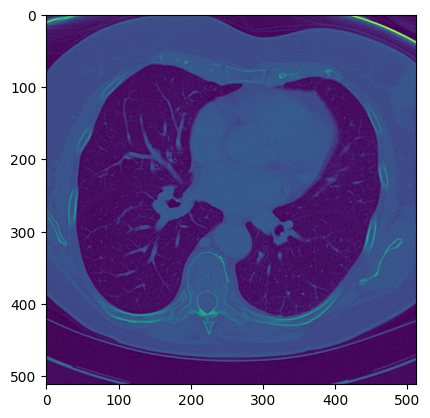

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[50])

# 表形式データ
## ワインの品質データ

In [53]:
import csv

wine_path = '../data/p1ch4/tabular-wine/winequality-white.csv'

wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [54]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))
wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [55]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [56]:
data = wineq[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
         ...,
         [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [57]:
target = wineq[:, -1]
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

In [58]:
# 品質スコアを整数値として扱う場合
target = wineq[:, -1].long()
target

tensor([6, 6,  ..., 7, 6])

In [63]:
# ワンホットエンコードする場合
## 次元数を揃える
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)
target_onehot

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [64]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

In [65]:
data_mean = torch.mean(data, dim=0)
data_mean, data_mean.shape

(tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
         1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01]),
 torch.Size([11]))

In [67]:
# torch.var() 不偏分散
data_var = torch.var(data, dim=0)
data_var, data_var.shape

(tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
         1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00]),
 torch.Size([11]))

In [72]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized, data_normalized.shape

(tensor([[ 1.7208e-01, -8.1761e-02,  ..., -3.4915e-01, -1.3930e+00],
         [-6.5743e-01,  2.1587e-01,  ...,  1.3422e-03, -8.2419e-01],
         ...,
         [-1.6054e+00,  1.1666e-01,  ..., -9.6251e-01,  1.8574e+00],
         [-1.0129e+00, -6.7703e-01,  ..., -1.4882e+00,  1.0448e+00]]),
 torch.Size([4898, 11]))

In [73]:
bad_indices = target <= 3
bad_indices.shape, bad_indices.dtype, bad_indices.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [74]:
bad_data = data[bad_indices]
bad_data.shape

torch.Size([20, 11])

In [88]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

print('{: >30} {: >6} {: >6}'.format('bad', 'mid', 'good'))
for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

                           bad    mid   good
 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [94]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:, 6]
predicted_indices = torch.lt(total_sulfur_data, total_sulfur_threshold) #less_than
predicted_indices.shape, predicted_indices.dtype, predicted_indices.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [90]:
torch.sum(total_sulfur_data<total_sulfur_threshold)

tensor(2727)

In [92]:
torch.tensor(4898) - torch.sum(total_sulfur_data<total_sulfur_threshold)

tensor(2171)

In [91]:
actual_indices = target > 5
actual_indices.shape, actual_indices.dtype, actual_indices.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [96]:
# 予測と実値でマッチしているインデックス数
n_matches = torch.sum(actual_indices & ~predicted_indices).item()
n_matches

1240

In [97]:
n_predicted = torch.sum(~predicted_indices).item()
n_actual = torch.sum(actual_indices).item()
n_matches / n_predicted, n_matches / n_actual

(0.5711653615845232, 0.38060159607120936)

# 時系列データ

In [98]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

In [ ]:
bike_numpy = np.loadtext(
    '../data/p1ch4/bike-sharing-dataset/hour-fixed.csv',
    dtype=np.float32,
)